![data-x](http://oi64.tinypic.com/o858n4.jpg)


# Homework 10: LTI

*Code snippets given run on both Python 2.7 and Python 3.5*


## Data-X (IEOR 290): HW 10

### Uvika Chaturvedi

#### SID: 3032162420

## Topics covered:

* Correlation
* Convolution
* Fourier Transforms

# Part 1: Theoretical Questions

*Answer the questions below by either writing (LaTeX'ing) them in the Markdown cell or handing in handwritten solutions at the start of next lecture (if you write by hand, also scan your handwritten solutions and push them to Github)*

## Question 1.1
Derive the mathematical relationship between covariance and correlation. Explain, with words, the difference between these two measurements.

Covariance = E[(X−μX)(Y−μY)])
Correlation = Covariance(X,Y)/σXσY

Covariance of X and Y show the variability in X and Y. If the bigger values of X correspond to bigger values of Y, that means that they have positive covariance. Dependency can be quantified by the covariance.
Correlation is the dimensionless quantitative measure of dependency. 

The only difference between the two is covariance has a dimension however correlation is dimensionless. It is been scaled out and is a better representation of dependency.

### Question 1.2
What is the difference between Pearson, Kendall, and Spearman correlation?

Pearson - It is the correlation which is used to measure the degree of relationship between linearly related variables. Pearson correlation is conducted with Point-biseral correlation except one of the variable is dichotomous.It assumes that variables are normally distributed and are linear and homoscedasticity. 

Kenddall - It is a non parametric test that measures the dependence. If we have 2 samples a and b, with sample size n, total number of pairing is n(n-1)/2. The formula is (number of concordant - number of discordant)/(n(n-1)/2)

Spearman - It is a non parametric test is used to measure the degree of association between variables. It does not assume about distribution of data and is used when the variables are measured on a scale that is at least ordinal

Source - http://www.statisticssolutions.com/correlation-pearson-kendall-spearman/


### Question 1.3
Why can it be useful to look at the correlation between features when you're creating a machine learning model?

It is useful to see correlation between features when you are creating ML models as it helps you do feature selection. You can choose the variables which are least correlated as it is costly to develop models and correlated model include the same variation in data. Specially with linear models we dont want the features to be dependent on each other due to the full rank nature of the matrix.

### Question 1.4
Intuitively, with words, explain the concept of convolution in the one dimensional case. Moreover, explain what cross-correlation, convolution, and auto-correlation have in common.

Convolution operates on two signals in one dimension as opposed to two images in two dimension. In this case we are sliding the kernel over the input image. 

Cross-correlation, correlation, convolution, and auto-correlation are all calculated using integrals for continuous functions, or sums for discrete functions). 

### Question 1.5
What is the difference between the *sample mean* and the *population mean*?

Sample is part of the population. So the mean of the sample is the mean of the part of the population. However population mean is the mean of the whole population. Sample mean can be a good estimator of population mean.

### Question 1.6

Prove that the forward Fourier transform of the $\mathrm{rect}$ function is: $\mathfrak{F}_t(\Pi(t)) = \int_{-\infty}^\infty \Pi(t)\cdot e^{-i 2\pi f t} \, dt
=\frac{\sin(\pi f)}{\pi f} = \mathrm{sinc}{(\pi f)}$, by calculating the integral.

    Input your answer here

# Part 2

## 2.0: Pre-Setup

In [1]:
# Remove warnings
import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
%matplotlib inline

from __future__ import print_function, division, absolute_import #make notebook compatible with Python 2 and Python 3

# Data description

- Data source: https://www.ncdc.noaa.gov/
- Data description: https://www7.ncdc.noaa.gov/CDO/GSOD_DESC.txt
- Data file: data.txt

# Question 2.1: Preprocess the data

- **2.1.1:** Read in the data in `data.txt` to a pandas DataFrame, and remove all white space characters in the column strings.


- **2.1.2:** Drop the columns with column indices `[0,1,4,6,7,8,9,10,12,14,16,20,21,22]`. I.e. you should only keep the `['YEARMODA', 'TEMP', 'DEWP', 'VISIB', 'WDSP', 'MXSPD', 'MAX', 'MIN','PRCP']` columns.


- **2.1.3:** Convert column `YEARMODA` to a Panda's Datetime object with `format='%Y%m%d'`. Assign the DataFrame index to be the Datetime converted `YEARMODA` column and delete the index name (with `del df.index.name`). Drop the column `YEARMODA` from the DataFrame.


- **2.1.4:** Columns `['MAX', 'MIN', 'PRCP']` contain non-numeric entries. Convert all these values in the three columns to dtype `float64`.


- **2.1.5:** There are some samples missing in the columns `['MAX','MIN','MXSPD','PRCP']`, these are recorded as unreasonably high values. See the Data description link above for further details. Assign `np.nan` (NaN) to these entries and then use pandas method `.interpolate()` on the DataFrame to replace the NaN entries with linearly interpolated, reasonable values.

In [315]:
import pandas as pd
import numpy as np
import re
from numpy.fft import fft
import matplotlib.pyplot as plt
from datetime import datetime
df = pd.read_csv("data.txt", header=0,sep=',')


In [316]:
'''Input answer to Question 2.1'''
def remove_white_space(val):
    pattern = re.compile(r'\s+')
    val= re.sub(pattern, '', val)
    return val

def format_yearmoda(val):
    temp = datetime.strptime(str(val),'%Y%m%d')
    return temp

def convert_float(val):
    temp = re.findall(r'\d+', str(val))
    temp1 = float(temp[0])
    return temp1


In [317]:
convert_float('45+')

45.0

In [318]:
h = []
for i in range(0,len(df.columns)):
    temp = remove_white_space(df.columns[i])
    h.append(temp)        
df.columns = h

df = df[['YEARMODA', 'TEMP', 'DEWP', 'VISIB', 'WDSP', 'MXSPD', 'MAX', 'MIN','PRCP']]

df['YEARMODA'] = df['YEARMODA'].apply(format_yearmoda)
df = df.set_index('YEARMODA')

In [319]:
df

,TEMP,DEWP,VISIB,WDSP,MXSPD,MAX,MIN,PRCP
YEARMODA,,,,,,,,
1974-01-01,44.1,34.8,23.0,9.0,17.1,51.8,37.4,0.20G
1974-01-02,41.8,18.4,29.4,12.7,19.0,51.8,33.8,0.12G
1974-01-03,40.9,32.2,14.3,9.8,18.1,44.6,33.8,0.08G
1974-01-04,40.0,36.6,12.4,8.5,18.1,44.6,36.9*,1.34G
1974-01-05,40.8,36.7,11.4,6.5,12.0,46.9*,37.0*,0.20G
1974-01-06,42.8,37.5,14.7,6.4,14.0,48.2,35.6,0.31G
1974-01-07,41.3,37.2,13.7,9.1,15.9,46.9*,35.6,0.16G
1974-01-08,42.1,33.3,26.9,4.6,10.1,53.1*,33.8,0.08G
1974-01-09,41.6,34.6,14.1,2.8,6.0,53.6,33.8,0.00G


In [320]:
del df.index.name

In [321]:
df['MAX'] = df['MAX'].apply(convert_float)
df['PRCP'] = df['PRCP'].apply(convert_float)
df['MIN'] = df['MIN'].apply(convert_float)

In [322]:
# df[df[['MAX','MIN','MXSPD','PRCP']].isnull()]
for col in ['MAX','MIN','MXSPD','PRCP']:
    df[col] = df[col].fillna(np.nan)
    df[col] = df[col].interpolate(method='linear', axis=0)


# Question 2.2: Correlation

- **2.2.1:** Find all the lowest (close to 0) and highest (close to 1 or -1, **hint:** look at the absolute value) correlation pairs in the DataFrame, excluding correlation with the same variable. Note that low correlation means abscence of correlation, i.e. the value is close to zero (and not negative numbers). High positive correlation is close to 1 and high negative correlation is close to -1. Answer with 8 correlation pairs for low correlation and 8 correlation pairs for high correlation.


- **2.2.2:** Look at features TEMP and WDSP (temperature and wind speed), find their yearly correlation and extract the year with the highest correlation, and the year with the lowest correlation between the two features. Hint: `df.index.year` will give you the years, and you can select yearly data by using `df[['TEMP','WDSP']]['1999']` (as an example for 1999). 


- **2.2.3:** Plot two plots, the first plot is the TEMP and WDSP signals (as line plots in the same plot) for the year with highest correlation, also subtract the individual mean for both features -- so that they are zero mean. Do the same in the second plot, but for the year with the lowest correlation between the features. Is it possible, by looking at the plots, to distinguish the highly correlated year from the year with the lowest correlation?

In [323]:
'''Input answers to Question 2.2'''

max_d = {}
min_d = {}
corr_matrix = df.corr()
for val in corr_matrix:
    temp = corr_matrix[corr_matrix[val].index != val][val]
    j = temp[abs(temp) == abs(temp).max()].index
    max_d[val] = j[0]
    k = j = temp[abs(temp) == abs(temp).min()].index
    min_d[val] = k[0] 

print (max_d)
print (min_d)

{'MXSPD': 'WDSP', 'PRCP': 'TEMP', 'TEMP': 'DEWP', 'VISIB': 'WDSP', 'DEWP': 'TEMP', 'MAX': 'TEMP', 'MIN': 'TEMP', 'WDSP': 'VISIB'}
{'MXSPD': 'MIN', 'PRCP': 'MIN', 'TEMP': 'PRCP', 'VISIB': 'MIN', 'DEWP': 'PRCP', 'MAX': 'MXSPD', 'MIN': 'PRCP', 'WDSP': 'PRCP'}


In [324]:
data = df[['TEMP','WDSP']]
data_group = data.groupby(df.index.year)

d = data_group.apply(lambda x:pd.rolling_corr(x['TEMP'],x['WDSP'],window = len(x)))

In [325]:
d = d.dropna()
d.index = d.index.droplevel(1)

In [326]:
minimum = d[d == abs(d).min()]
maximum = d[d == abs(d).max()]
print ("The minimum is:", minimum)
print ("The maximum is:",maximum)

The minimum is: 2008    0.043629
dtype: float64
The maximum is: 1994    0.414242
dtype: float64


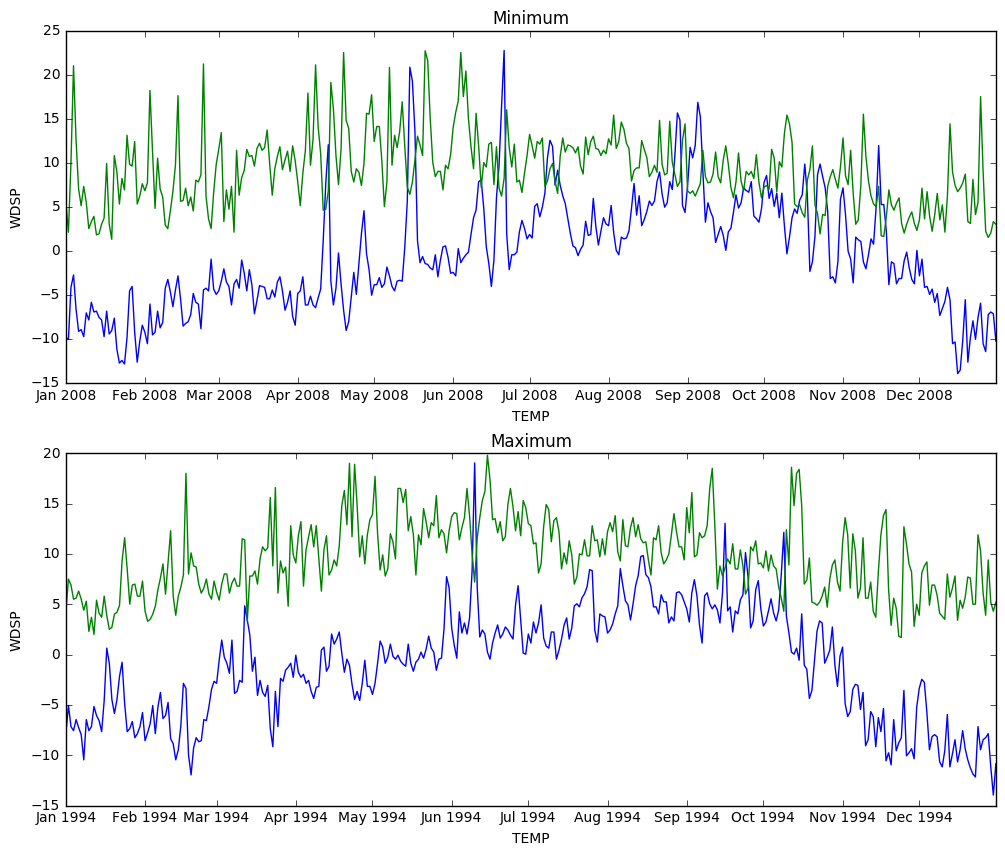

In [327]:
data['TEMP'] = data['TEMP'] - data['TEMP'].mean()
fig, ax = plt.subplots(2,1, figsize = (12,10))
ax[0].plot(data['TEMP']['2008'].index,data['TEMP']['2008'])
ax[0].plot(data['WDSP']['2008'].index,data['WDSP']['2008'])
ax[1].plot(data['TEMP']['1994'].index,data['TEMP']['1994'])
ax[1].plot(data['WDSP']['1994'].index,data['WDSP']['1994'])
ax[0].set_title('Minimum')
ax[1].set_title('Maximum')
ax[0].set_xlabel('TEMP')
ax[0].set_ylabel('WDSP')
ax[1].set_xlabel('TEMP')
ax[1].set_ylabel('WDSP')

fig.show()

# Question 2.3: FFT & Convolution

If you are unsure about the answers to the questions below, please look through the lecutre notes on FFT and LTI, found here: https://github.com/ikhlaqsidhu/data-x/tree/master/04b-theory-data-signal-lti

- **2.3.1:** Create a variable called signal with the temperature data, i.e.: `signal = df['TEMP']`. Subtract the mean from the signal (so that it becomes zero mean).


- **2.3.2:** Take monthly mean samples from the signal (hint: use pandas method `.resample('M',how='mean')`. If you run `signal.shape`, on the resampled signal, it should be `(516,)`.


- **2.3.3:** Plot the absolute value of the FFT of the resampled signal, i.e. `fft_x = np.abs(np.fft.fft(signal))`. Where do you expect to find peaks on the frequency spectrum, and why? How is this related to (eventual) seasonality in the temperature data?


- **2.3.4:** Instead of plotting the direct Fourier transform of the resampled signal, only plot the first half and normalize it, to get the correct amplitude. I.e. `2/len(signal) * fft_x[:int(np.ceil(len(signal)/2))]`). Plot this normalized, first half of the FFT.


- **2.3.5:** Convolve the resampled signal (from **2.3.2**), with a rect function that is half the length of a period in the temp data (i.e. 6 months, since we resampled monthly). Hint: use `np.convolve(signal,rect)` where `rect = np.ones(6)/6`. Plot the the resulting, convolved signal and explain what happened.


- **2.3.6:** Take the FFT of the convolved signal and normalize it (i.e. multiply by `2.0/n`). Only plot the first half of the FFT (just like in **2.3.4**). What has changed in the frequency spectrum after the signal was convolved? Also, try to explain why this happened.

In [297]:
# Install package mpld3 if you want to be able to zoom in plots: https://anaconda.org/conda-forge/mpld3
import sklearn
from sklearn.preprocessing import normalize
%matplotlib inline
# mpld3.enable_notebook()
import warnings
warnings.filterwarnings('ignore')

In [293]:
'''Input answers to Question 2.3'''
signal = df['TEMP'] - df['TEMP'].mean()

In [294]:
signal = signal.resample('M',how='mean')
signal.shape

(516,)

(0, 516)

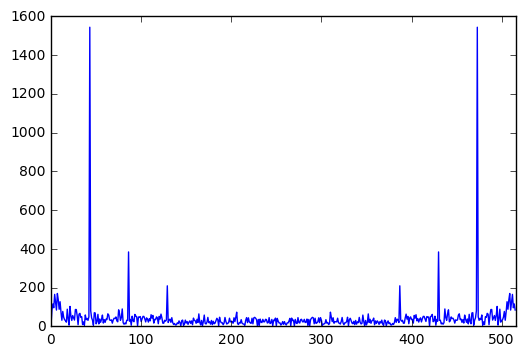

In [295]:
fft_x = np.abs(np.fft.fft(signal))
plt.plot(fft_x)
plt.xlim(0,516)

In [302]:
signal2 = 2/len(signal) * fft_x[:int(np.ceil(len(signal)/2))]

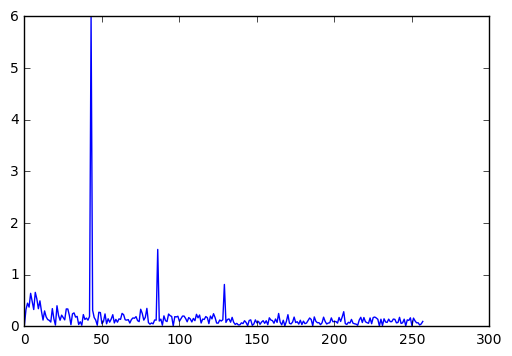

In [303]:
plt.plot(signal2)
plt.show()

In [306]:
rect = np.ones(6)/6
result = np.convolve(signal,rect)

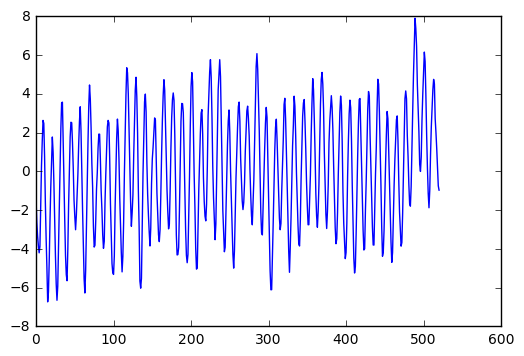

In [307]:
plt.plot(result)

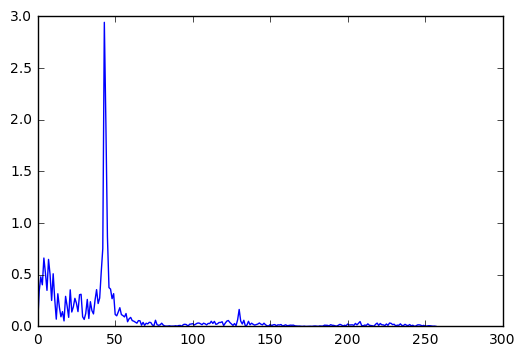

In [333]:
fft_x_2 = np.abs(np.fft.fft(result))
half_normalized = 2/len(signal) * fft_x_2[:int(np.ceil(len(signal)/2))]

plt.plot(half_normalized,'b')